# Earthworks: Basics

Brendan Harmon  
2025-07-02

<figure>
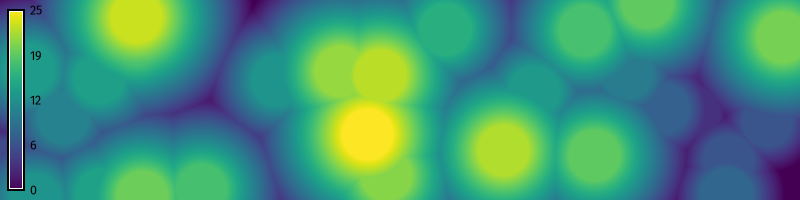
<figcaption aria-hidden="true">Random earthworks</figcaption>
</figure>

Learn the basics of terrain modeling with
[r.earthworks](https://grass.osgeo.org/grass-stable/manuals/addons/r.earthworks.html).
This tool uses cut and fill operations to tranform topography. Cut
operations subtract from a topographic surface, while fill operations
add to the topography. Transformations are based on proposed local
topographic extrema, i.e. high points and low points. These extrema can
be set with coordinates, rasters, vector points, or vector lines. In
GRASS raster and vector data can be drawn with the [raster
digitizer](https://grass.osgeo.org/grass-stable/manuals/wxGUI.rdigit.html)
and [vector
digitizer](https://grass.osgeo.org/grass-stable/manuals/wxGUI.vdigit.html).
Transformations are a function of the existing elevation, change in
vertical distance, and change in slope over horizontal distance.
Vertical distance is calculated as the difference between proposed local
extrema and a topographic datum, while change in slope is a function of
growth and decay applied to horizontal change in distance. This tutorial
covers:

-   Cut operations
-   Fill operations
-   Cut & fill operations
-   Random operations

> **Computational notebook**
>
> This tutorial can be run as a [computational
> notebook](https://grass-tutorials.osgeo.org/content/tutorials/earthworks/basics.ipynb).
> Learn how to work with notebooks with the tutorial [Get started with
> GRASS & Python in Jupyter
> Notebooks](./get_started/fast_track_grass_and_python.qmd).

# Setup

## Project

Start a GRASS session in a new project with a Cartesian (XY) coordinate
system.

In [1]:
# Import libraries
import os
import sys
import subprocess
from pathlib import Path

# Find GRASS Python packages
sys.path.append(
  subprocess.check_output(
    ["grass", "--config", "python_path"],
    text=True
    ).strip()
  )

# Import GRASS packages
import grass.script as gs
import grass.jupyter as gj

# Create a temporary folder
import tempfile
temporary = tempfile.TemporaryDirectory()

# Create a project in the temporary directory
gs.create_project(path=temporary.name, name="xy")

# Start GRASS in this project
session = gj.init(Path(temporary.name, "xy"))

## Installation

Install
[r.earthworks](https://grass.osgeo.org/grass-stable/manuals/addons/r.earthworks.html)
with
[g.extension](https://grass.osgeo.org/grass-stable/manuals/g.extension.html).

In [2]:
# Install extension
gs.run_command("g.extension", extension="r.earthworks")

## Region

Use
[g.region](https://grass.osgeo.org/grass-stable/manuals/g.region.html)
to set the extent and resolution of the computational region. Create a
region starting at the origin and extending two hundred units north and
eight hundred units east. Use the raster calculator
[r.mapcalc](https://grass.osgeo.org/grass-stable/manuals/r.mapcalc.html)
to generate a flat terrain with an constant elevation of zero.

In [3]:
# Set region
gs.run_command("g.region", n=200, e=800, s=0, w=0, res=1)

# Generate base elevation
gs.mapcalc("elevation = 0")

<figure>
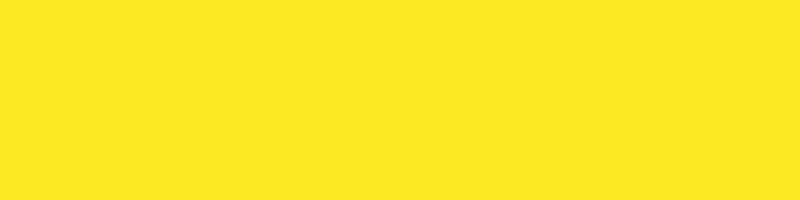
<figcaption aria-hidden="true">Constant base elevation</figcaption>
</figure>

# Fill Operations

Use a fill operation to model a peak from a set of x- and y-coordinates
with
[r.earthworks](https://grass.osgeo.org/grass-stable/manuals/addons/r.earthworks.html).
These coordinates represents a local topographic maxima, i.e. a high
point. The algorithm will fill locally up to that point, then the slopes
will fall off at a given rate of decay. Set `coordinates` to a pair of x-
and y-coordinates. Use the `z` parameter to set a z-coordinate for the
top of the peak. Optionally use the `flat` parameter to create a plateau
at the top of the peak. Using the default linear growth and decay
function $z = z_0 - r \sqrt{\Delta x^2 + \Delta y^2}$, 
set the `linear` slope parameter to
0.5 to model a 50 percent slope.

In [4]:
# Model earthworks
gs.run_command(
    "r.earthworks",
    elevation="elevation",
    earthworks="peak",
    operation="fill",
    coordinates=[400, 100],
    z=25,
    flat=25,
    linear=0.5
    )

# Visualize
m = gj.Map(width=800)
m.d_rast(map="peak")
m.d_legend(raster="peak", color="white", at=(5, 95, 1, 3))
m.show()

<figure>
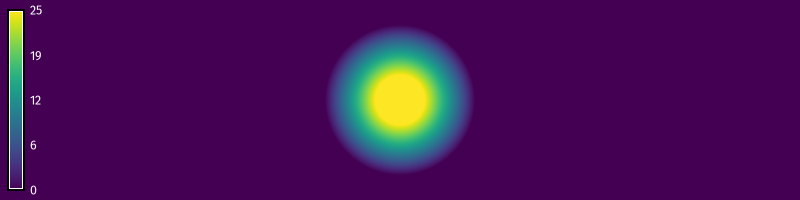
<figcaption aria-hidden="true">Peak</figcaption>
</figure>

# Cut Operations

Use a cut operation to model a pit from a set of x- and y-coordinates
with
[r.earthworks](https://grass.osgeo.org/grass-stable/manuals/addons/r.earthworks.html).
Set a z-coordinate for the bottom of the pit. These coordinates
represents a local topographic minima, i.e. a low point. The algorithm
will cut locally down to that point, then the slopes will climb at a
given rate of growth.

In [5]:
# Model earthworks
gs.run_command(
    "r.earthworks",
    elevation="elevation",
    earthworks="pit",
    operation="cut",
    coordinates=[400, 100],
    z=-25,
    flat=25,
    linear=0.5
    )

# Visualize
m = gj.Map(width=800)
m.d_rast(map="pit")
m.d_legend(raster="pit", color="black", at=(5, 95, 1, 3))
m.show()

<figure>
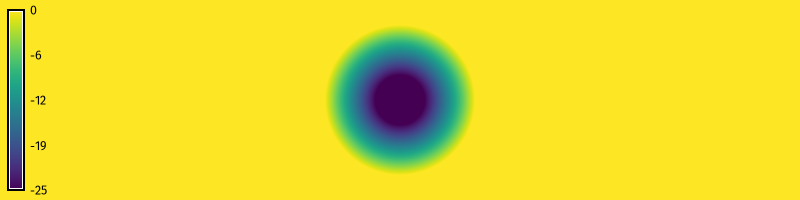
<figcaption aria-hidden="true">Pit</figcaption>
</figure>

# Cut & Fill Operations

Use cut and fill operations to model a pit and a peak from two sets of
x- and y-coordinates with
[r.earthworks](https://grass.osgeo.org/grass-stable/manuals/addons/r.earthworks.html).
Set a z-coordinate for the bottom of the pit and another z-coordinate
for the top of the peak.

In [6]:
# Model earthworks
gs.run_command(
    "r.earthworks",
    elevation="elevation",
    earthworks="pit_and_peak",
    operation="cutfill",
    coordinates=[350, 100, 450, 100],
    z=[-25, 25],
    flat=25,
    linear=0.5
    )

# Visualize
m = gj.Map(width=800)
m.d_rast(map="pit_and_peak")
m.d_legend(raster="pit_and_peak", color="black", at=(5, 95, 1, 3))
m.show()

<figure>
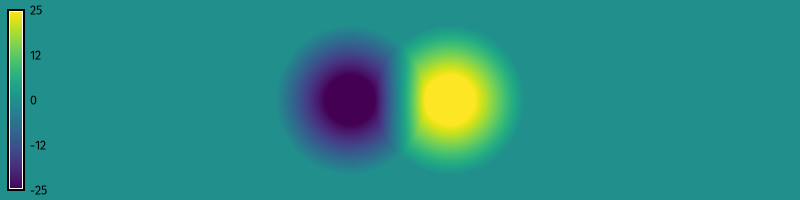
<figcaption aria-hidden="true">Pit &amp; peak</figcaption>
</figure>

# Random Operations

## Randomness

Model a set of random peaks by generating a random surface, sampling
random points, and then filling on those points. First generate a random
surface with
[r.surf.random](https://grass.osgeo.org/grass-stable/manuals/r.surf.random.html).
Set a `seed` for reproducible results or set `flags="s"` for a random
seed. Then randomly sample 50 cells from the random surface
[r.random](https://grass.osgeo.org/grass-stable/manuals/r.random.html).
Use a fill operation to model random peaks with
[r.earthworks](https://grass.osgeo.org/grass-stable/manuals/addons/r.earthworks.html).
Set input raster to the random cells.

In [7]:
# Generate random surface
gs.run_command("r.surf.random", out="surface", min=0, max=25, seed=2)

# Sample random points
gs.run_command(
    "r.random",
    input="surface",
    npoints=50,
    raster="random",
    seed=7
    )

# Model earthworks
gs.run_command(
    "r.earthworks",
    elevation="elevation",
    earthworks="earthworks",
    operation="fill",
    raster="random",
    linear=0.25,
    flat=25
    )

# Visualize
m = gj.Map(width=800)
m.d_rast(map="earthworks")
m.d_legend(raster="earthworks", digits=0, at=(5, 95, 1, 3))
m.show()

<figure>
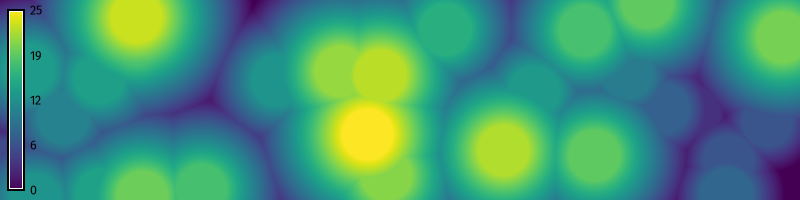
<figcaption aria-hidden="true">Random peaks</figcaption>
</figure>

## Visualization

Compute contours for earthworks with
[r.contour](https://grass.osgeo.org/grass-stable/manuals/r.contour.html).

In [8]:
# Derive contours
gs.run_command("r.contour", input="earthworks", output="contours", step=2)

# Visualize Contours
m = gj.Map(width=800)
m.d_vect(map="contours")
m.show()

<figure>
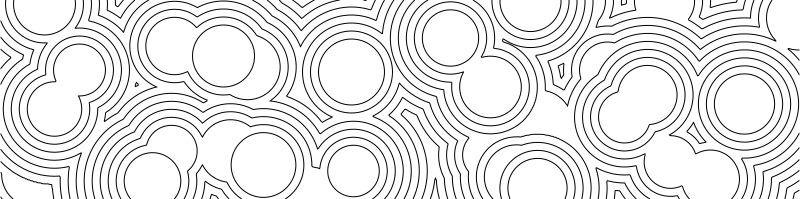
<figcaption aria-hidden="true">Contours</figcaption>
</figure>